In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pylab 
import random # for plotting the 2D plot
from mpl_toolkits.mplot3d import Axes3D # for plotting the 3D plot
from matplotlib import animation
from IPython.display import HTML
from numpy.lib.npyio import NpzFile

In [ ]:
# 1 - Static Graph

In [ ]:
# 1D - 1 dimensional random walk, 3 moves on 2 axis: right, up, down

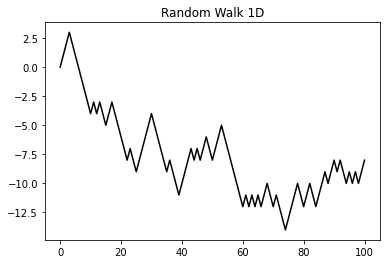

In [9]:
def RW1D(n): # define function, n is number of steps
   x = 0
   y = 0
   xposition = [0] # starting from point (0,0)
   yposition = [0] 
   for i in range (1,n+1):
       step = np.random.uniform(0,1)
       if step < 0.5: # if step is less than 0.5 we move up on x and y   
           x += 1 # move right on x
           y += 1  # move up on y
       if step > 0.5: # if step is greater than 0.5 we move down on x and y
           x += 1 # move right on x
           y += -1 # move down on y
 
       xposition.append(x) # create x values
       yposition.append(y) # create y values
   return [xposition,yposition]

RW = RW1D(100) # create 100 steps 
plt.plot(RW[0],RW[1],'k-', label = "RW") # array RW has 2 columns: 1st RW[0] and 2nd RW[1]
plt.title("Random Walk 1D")
plt.show()

In [ ]:
# 2D - 2 dimensional random walk, 4 moves on 2 axis: up, down, right, left

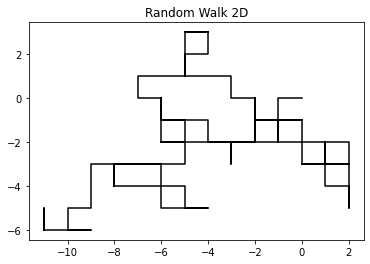

In [7]:
n = 100 # n is the number of steps
x = np.zeros(n) # x and y are arrays which store the coordinates of the position 
y = np.zeros(n) 
direction=["UP","DOWN","RIGHT","LEFT"] # Assuming the four directions of movement.
for i in range(1, n): 
    step = random.choice(direction) #Randomly choosing the direction of movement. 
    if step == "RIGHT": 
        x[i] = x[i - 1] + 1 # move right on x
        y[i] = y[i - 1] 
    elif step == "LEFT": 
        x[i] = x[i - 1] - 1 # move left on x
        y[i] = y[i - 1] 
    elif step == "UP": 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1 # move up on y
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1 # move down on y
pylab.title("Random Walk 2D")
pylab.plot(x, y,'k-') # plot the walk
pylab.show()

In [ ]:
# 3D - 3 dimensional random walk, 6 moves on 3 axis: up, down, right, left, back, front

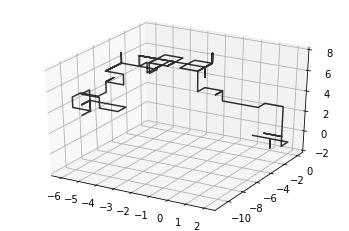

In [ ]:
N =100
R = (np.random.rand(N)*6).astype("int") # randomly intialize 1 array with 6 moves: 0,1,2,3,4,5 and 100 steps, combinations
x = np.zeros(N) # 100 x steps
y = np.zeros(N) # 100 y steps
z = np.zeros(N) # 100 z steps
x[ R==0 ] = -1 # left
x[ R==1 ] = 1 # right
y[ R==2 ] = -1 # down
y[ R==3 ] = 1 # up
z[ R==4 ] = -1 # back
z[ R==5 ] = 1 # front
x = np.cumsum(x) # cumsum() sums the steps across for each axis of the plane
y = np.cumsum(y)
z = np.cumsum(z)
plt.figure()
ax = plt.subplot(1,1,1, projection='3d')
ax.plot(x, y, z,'k-',alpha=0.8)  # alpha sets the line transparency
# ax.scatter(x[-1],y[-1],z[-1]) # display some point
plt.show()

In [ ]:
# 3D surface - 3 dimensional surface random walk, 6 moves on 3 axis: up, down, right, left, back, front

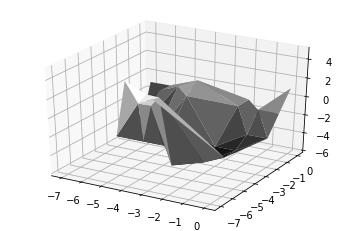

In [ ]:
N =100 # choose number of steps
R = (np.random.rand(N) * 6).astype("int") # randomly intialize 1 array with 6 moves: 0,1,2,3,4,5 and 100 steps, combinations
x = np.zeros(N) # 100 x steps
y = np.zeros(N) # 100 y steps
z = np.zeros(N) # 100 z steps
x[ R==0 ] = -1 # left
x[ R==1 ] = 1 # right
y[ R==2 ] = -1 # down
y[ R==3 ] = 1 # up
z[ R==4 ] = -1 # back
z[ R==5 ] = 1 # front
x = np.cumsum(x) # cumulative sums the steps across for each axis of the plane
y = np.cumsum(y)
z = np.cumsum(z)
ax = plt.figure().add_subplot(1,1,1, projection='3d')
ax.plot_trisurf(x, y, z,cmap='gray', linewidth=0.2, antialiased=True) # plot triangulated random surface
# ax.scatter(x[-1],y[-1],z[-1]) # display some point
plt.show()

In [ ]:
# 2 - Animation

In [ ]:
# 1D animation - 2 dimensional random walk, 3 moves on 2 axis: up, down, right

In [20]:
def random_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    # event space: set of possible increments
    increments = np.array([1, -1])
    # the probability to generate 1
    p=0.5
    
    # the epsilon values
    random_increments = np.random.choice(increments, N, p)
    # calculate the random walk
    random_walk = np.cumsum(random_increments)
    
    # return the entire walk and the increments
    return random_walk, random_increments
  
  # generate a random walk
N = 500
X, epsilon = random_walk(N)

# normalize the random walk using the Central Limit Theorem
X = X * np.sqrt(1./N)

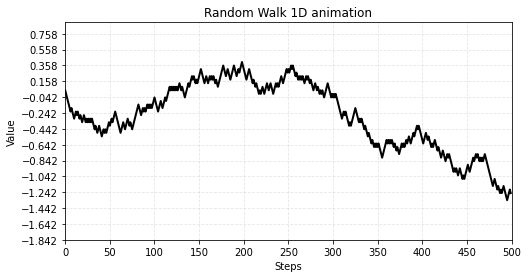

In [35]:
fig = plt.figure(figsize=(8, 4))
ax = plt.axes(xlim=(0, N), ylim=(np.min(X) - 0.5, np.max(X) + 0.5)) 
line, = ax.plot([], [], lw=2, color='black')
ax.set_xticks(np.arange(0, N+1, 50))
ax.set_yticks(np.arange(np.min(X) - 0.5, np.max(X) + 0.5, 0.2))
ax.set_title('Random Walk 1D animation', fontsize=12)
ax.set_xlabel('Steps', fontsize=10)
ax.set_ylabel('Value', fontsize=10)
ax.tick_params(labelsize=10)
ax.grid(True, which='major', linestyle='--', color='silver', alpha=0.4)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], []

# animation function 
def animate(i):
    y = X[i] 
    # appending new points to x, y axes points list 
    xdata.append(i) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line,

# call the animator	 
anim1D = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=True)
HTML(anim1D.to_html5_video())

In [ ]:
# 2D animation - 2 dimensional random walk, 4 moves on 2 axis: up, down, right, left

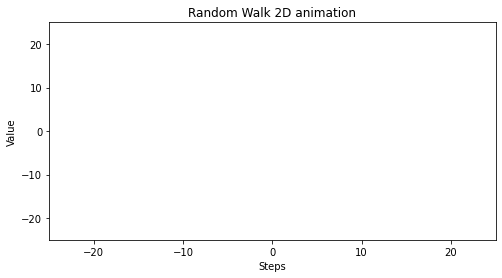

In [52]:
# define some plot variables
fig, ax = plt.subplots(figsize=(8,4))
bound = 25
ax.set_xlim(-bound,bound)
ax.set_ylim(-bound,bound)
ax.set_title('Random Walk 2D animation', fontsize=12)
ax.set_xlabel('Steps', fontsize=10)
ax.set_ylabel('Value', fontsize=10)

# define the possible moves at each step of the random walk
dirs = np.array([[0,1],[0,-1],[1,0],[-1,0]])

# define a numpy array to hold the locations visited on the random walk
locations = np.zeros((1,2)) # 1 row, 2 columns

# define a function to make animation frames
def run(i):
  global locations
  global bound
  
  # first frame is handled separately
  if i == 0:
    line, = ax.plot([], [], lw=2)
    ax.plot(0,0,'ko')
    return line
  
  # generate a step of the random walk
  r = random.randrange(4)
  move = dirs[r]
  nextloc = [locations[-1] + move]
  locations = np.append(locations, nextloc, axis=0)
  
  # set the plot data
  xdata = locations[:,0]
  ydata = locations[:,1]
  
  ax.cla() # clear the previous plot (necessary for removing old dots)
  
  # update the plot limits
  ax.set_xlim(min(-bound,min(xdata)-1), max(bound,max(xdata)+1))
  ax.set_ylim(min(-bound,min(ydata)-1), max(bound,max(ydata)+1))
  ax.set_title('Random Walk 2D animation', fontsize=12)
  ax.set_xlabel('Steps', fontsize=10)
  ax.set_ylabel('Value', fontsize=10)
  
  # redraw the plot
  line, = ax.plot([], [], 'k-')
  line.set_data(xdata, ydata)
  ax.plot(locations[-1,0], locations[-1,1], 'k-','start 0,0')
  
  return line

In [53]:
anim2D = animation.FuncAnimation(fig, run, frames=500, interval=100)

In [54]:
HTML(anim2D.to_html5_video())

In [55]:
HTML(anim2D.to_jshtml())

In [ ]:
# 3D animation -  3 dimensional random walk, 6 moves on 3 axis: up, down, right, left, back, front

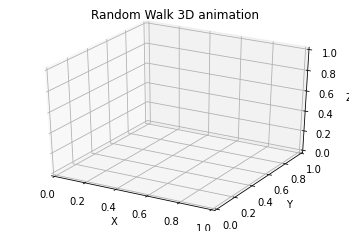

In [61]:
# Fixing random state for reproducibility
np.random.seed(1000)

def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk

def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines

# Define 5 random walk chains as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(5)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_title('Random Walk 3D animation', fontsize=12)

# Create lines initially without data
lines = [ax.plot([], [], [],'k-' )[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
anim3D = animation.FuncAnimation(fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

HTML(anim3D.to_html5_video())